In [46]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from scipy.stats import multivariate_normal, entropy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment

np.random.seed(0)

In [47]:
def accuracy(true_labels, predicted_labels):
    cont_matrix = contingency_matrix(true_labels, predicted_labels)
    row_ind, col_ind = linear_sum_assignment(cont_matrix, maximize = True)
    accuracy = cont_matrix[row_ind, col_ind].sum() / len(true_labels)
    
    return accuracy

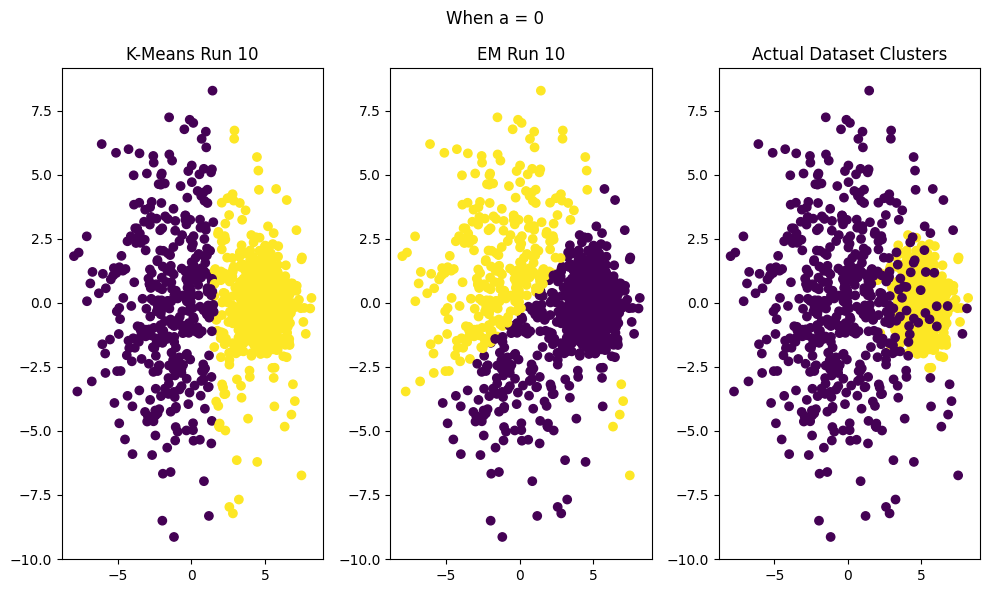

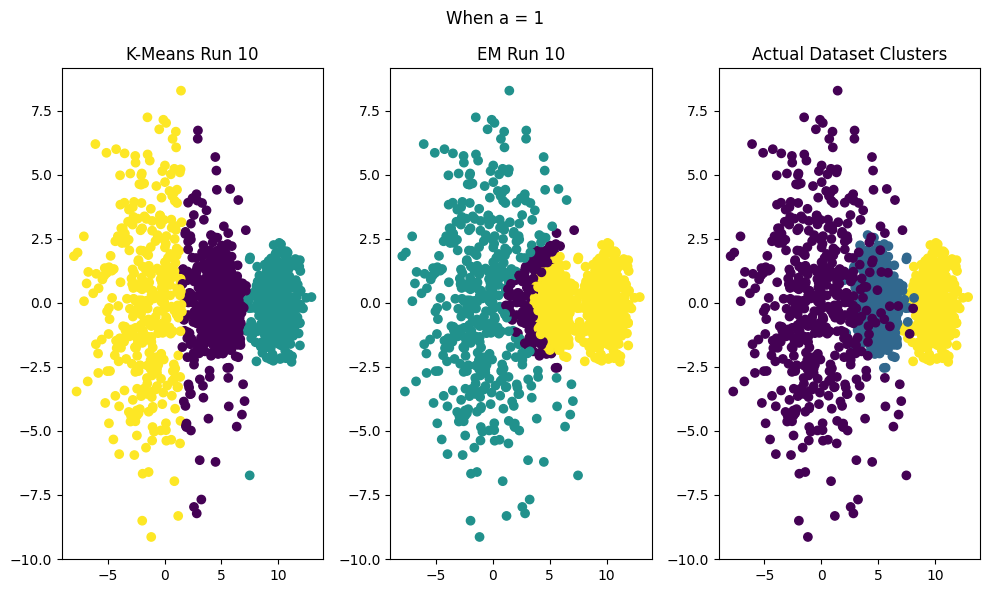

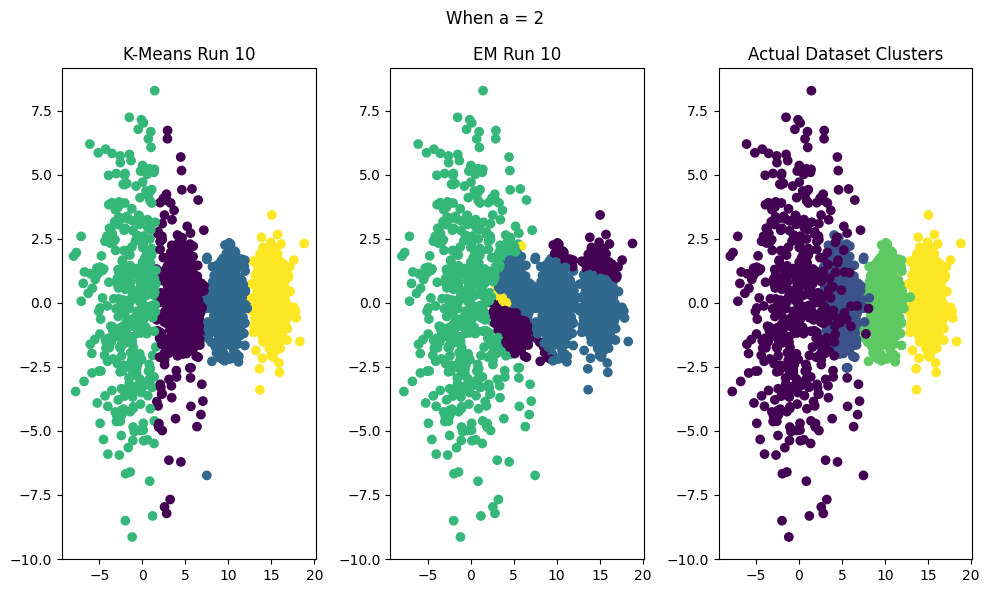

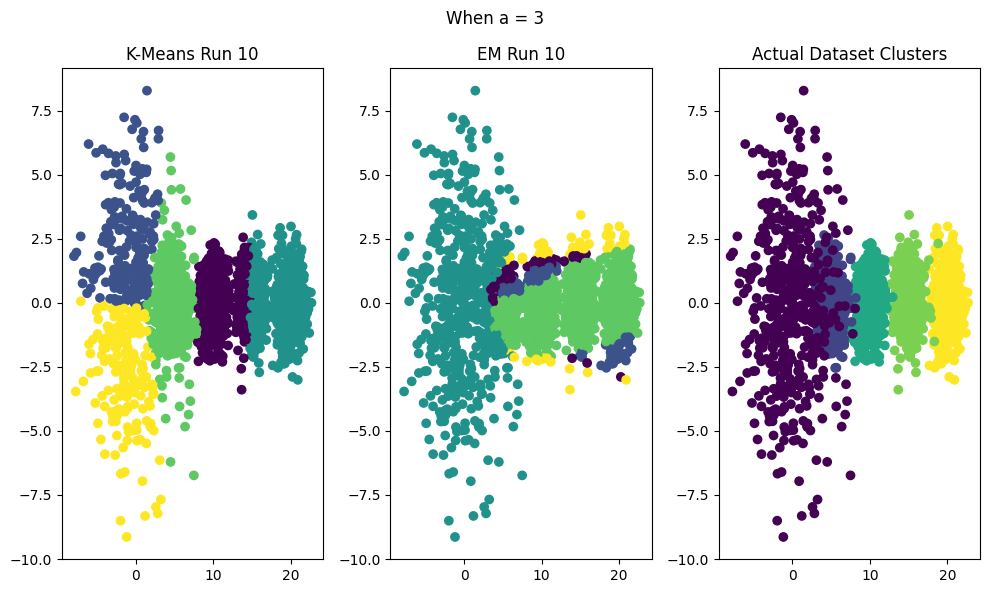

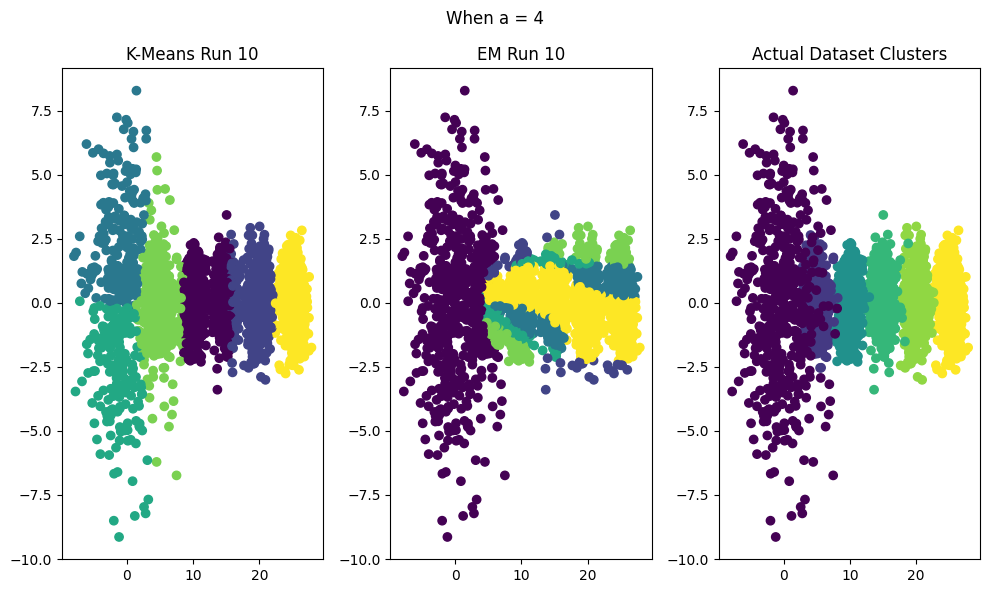

In [48]:
Xq = np.random.normal(loc = 0, scale = 3, size = (500, 2))

accuracy_kmeans = []
ari_kmeans = []
accuracy_em = []
ari_em = []
for a in range(5):
    Xa = np.random.multivariate_normal(mean = np.array([5*(a+1), 0]), cov = np.eye(2), size = 500)

    if a == 0:
        X = np.concatenate((Xa, Xq))
        true_labels = np.concatenate((np.ones(500), np.zeros(500)))
    if a > 0:
        X = np.concatenate((Xa, X))
        true_labels = np.concatenate(((a+2)*np.ones(500), true_labels))


    em_clusters = []
    kmeans_clusters = []

    for i in range(10):
        kmeans = KMeans(n_clusters = a + 2, random_state = i)
        kmeans.fit(X)
        kmeans_clusters.append(kmeans.labels_)

        em = GaussianMixture(n_components = a +2, random_state = i, init_params = 'random')
        em.fit(X)
        em_clusters.append(em.predict(X))

        accuracyk = accuracy(true_labels, kmeans_clusters[i])
        arik = adjusted_rand_score(true_labels, kmeans_clusters[i])

        accuracyem = accuracy(true_labels, em_clusters[i])
        ariem = adjusted_rand_score(true_labels, em_clusters[i])
        
        accuracy_kmeans.append(accuracyk)
        ari_kmeans.append(arik)
        accuracy_em.append(accuracyem)
        ari_em.append(ariem)

        if i == 9:
            plt.figure(figsize = (10, 6))

            plt.subplot(1, 3, 1)
            plt.scatter(X[:, 0], X[:, 1], c = kmeans_clusters[0])
            plt.title("K-Means Run {}".format(i+1))

            plt.subplot(1, 3, 2)
            plt.scatter(X[:, 0], X[:, 1], c = em_clusters[0])
            plt.title("EM Run {}".format(i+1))
            
            plt.subplot(1,3,3)
            plt.scatter(X[:, 0], X[:, 1], c = true_labels)
            plt.title('Actual Dataset Clusters')


            plt.suptitle('When a = {}'.format(a))
            plt.tight_layout()
            plt.show()

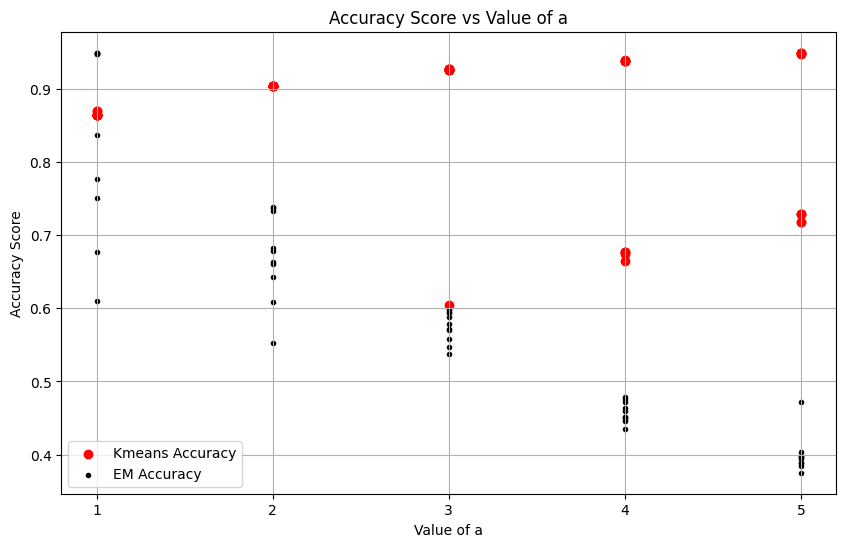

In [49]:
plt.figure(figsize = (10,6))
plt.scatter(np.repeat(np.arange(1, 6), 10), accuracy_kmeans, color = 'red', label = 'Kmeans Accuracy')
plt.scatter(np.repeat(np.arange(1, 6), 10), accuracy_em, color = 'black', label = 'EM Accuracy', marker = '.')
plt.xlabel('Value of a')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Value of a')
plt.xticks([1,2,3,4,5])
plt.grid()
plt.legend()
plt.show()

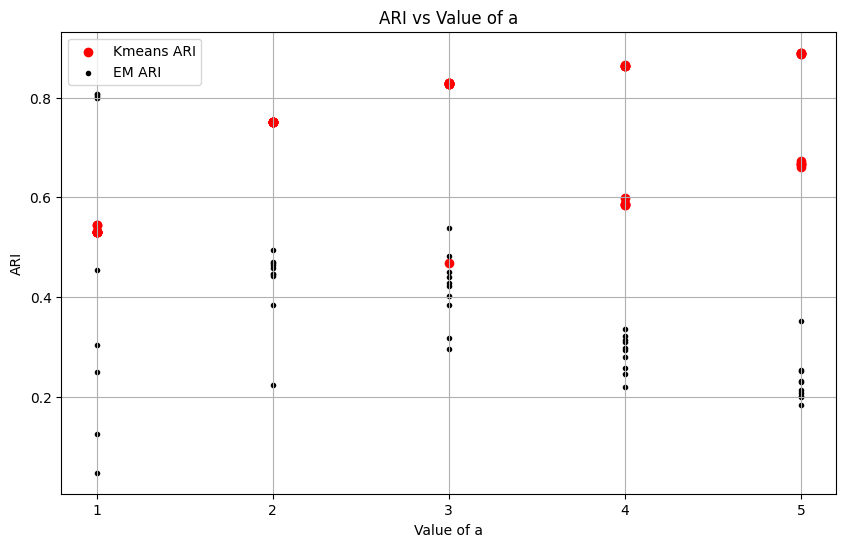

In [50]:
plt.figure(figsize = (10,6))
plt.scatter(np.repeat(np.arange(1, 6), 10), ari_kmeans, color = 'red', label = 'Kmeans ARI')
plt.scatter(np.repeat(np.arange(1, 6), 10), ari_em, color = 'black', label = 'EM ARI',  marker = '.')
plt.xlabel('Value of a')
plt.ylabel('ARI')
plt.title('ARI vs Value of a')
plt.xticks([1,2,3,4,5])
plt.grid()
plt.legend()
plt.show()